In [13]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import rc
from matplotlib import gridspec
import cmath
import scipy as scipy
from mpl_toolkits.mplot3d import Axes3D
from plot_utils import save_fig
from matplotlib.colors import ListedColormap
import tikzplotlib
# plot settings
rc('axes', linewidth=3)
rc('text', usetex=True)
rc('font', size=24, family='arial', weight='bold')
rc('lines',linewidth=1.5,color='blue')
rc('xtick.major', pad=10, size=5, width=3)
rc('ytick.major', pad=10, size=5, width=3)

In [60]:
#df = pd.read_csv(r'./All_data.dat' , delimiter='  ', skip_blank_lines=True)

df = pd.read_csv(r'./../06_data/20220124_all_data.dat', delimiter='  ', skip_blank_lines=True)
df64=pd.read_csv ("./../02_DMRG/L_64/L_64_data_for_panda_extended.csv",header=None)
df64.sort_values(by=[0])
df64 = df64.transpose()
df64.rename(columns=df64.iloc[0], inplace = True)
df64.drop([0], inplace = True)

/home/pkrah/Software/miniconda3/envs/sPOD/lib/python3.9/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [61]:
df = df.sort_values(by=['bondD'], ascending=False)
df = df.reset_index()  # make sure indexes pair with number of rows
data = []
matching_attributes = ["Lx","lambda","mu_y","theta"]
for index, row in df.iterrows():
    row_is_in_data=False
    for d in data:
        count = 0
        for key in matching_attributes:
            #print(key,d[key],row[key])
            if d[key]==row[key]:
                count +=1
            else:
                break
        
        #print(" ")
        if count == len(matching_attributes):
            row_is_in_data=True
            break
    
    if not row_is_in_data:
        data.append(row)

In [50]:
df2 = pd.DataFrame(data)
#print(df2)

In [51]:
#df.sort_values(by=['Lx'])
lattsizes = df.Lx.to_numpy()
lattsizes = np.unique(lattsizes)
print(lattsizes)
#print(df.Lx)

[ 3  4  8 10 12 16 20 24]


In [62]:
tempMU  = np.array(df[(df['Lx']==3)]['mu_y']); 
tempWIN = np.array(df[(df['Lx']==3)]['winding']);
tempEN  = np.array(df[(df['Lx']==3)]['Energy_GS']);
tempMA  = np.array(df[(df['Lx']==3)]['MA']);  tempMB  = np.array(df[(df['Lx']==3)]['MB']);
indL3   = tempMU.argsort();
L3mu = tempMU[indL3]; L3Wind = tempWIN[indL3]; L3energy = tempEN[indL3];
L3MA = tempMA[indL3]; L3MB = tempMB[indL3];
#
tempMU  = np.array(df[(df['Lx']==4)]['mu_y']); 
tempWIN = np.array(df[(df['Lx']==4)]['winding']);
tempEN  = np.array(df[(df['Lx']==4)]['Energy_GS']);
tempMA  = np.array(df[(df['Lx']==4)]['MA']);  tempMB  = np.array(df[(df['Lx']==4)]['MB']);
indL4   = tempMU.argsort();
L4mu = tempMU[indL4]; L4Wind = tempWIN[indL4]; L4energy = tempEN[indL4];
L4MA = tempMA[indL4]; L4MB = tempMB[indL4];
#
tempMU  = np.array(df[(df['Lx']==8)]['mu_y']); 
tempWIN = np.array(df[(df['Lx']==8)]['winding']);
tempEN  = np.array(df[(df['Lx']==8)]['Energy_GS']);
tempMA  = np.array(df[(df['Lx']==8)]['MA']);  tempMB  = np.array(df[(df['Lx']==8)]['MB']);
indL8   = tempMU.argsort();
L8mu = tempMU[indL8]; L8Wind = tempWIN[indL8]; L8energy = tempEN[indL8];
L8MA = tempMA[indL8]; L8MB = tempMB[indL8];
#
tempMU  = np.array(df[(df['Lx']==10)]['mu_y']); 
tempWIN = np.array(df[(df['Lx']==10)]['winding']);
tempEN  = np.array(df[(df['Lx']==10)]['Energy_GS']); 
tempMA  = np.array(df[(df['Lx']==10)]['MA']);  tempMB  = np.array(df[(df['Lx']==10)]['MB']);
indL10  = tempMU.argsort();
L10mu = tempMU[indL10]; L10Wind = tempWIN[indL10]; L10energy = tempEN[indL10];
L10MA = tempMA[indL10]; L10MB = tempMB[indL10];
#
tempMU  = np.array(df[(df['Lx']==12)]['mu_y']); 
tempWIN = np.array(df[(df['Lx']==12)]['winding']);
tempEN  = np.array(df[(df['Lx']==12)]['Energy_GS']); 
tempMA  = np.array(df[(df['Lx']==12)]['MA']);  tempMB  = np.array(df[(df['Lx']==12)]['MB']);
indL12  = tempMU.argsort();
L12mu = tempMU[indL12]; L12Wind = tempWIN[indL12]; L12energy = tempEN[indL12];
L12MA = tempMA[indL12]; L12MB = tempMB[indL12];
#
tempMU  = np.array(df[(df['Lx']==16)]['mu_y']); 
tempWIN = np.array(df[(df['Lx']==16)]['winding']);
tempEN  = np.array(df[(df['Lx']==16)]['Energy_GS']);
tempMA  = np.array(df[(df['Lx']==16)]['MA']);  tempMB  = np.array(df[(df['Lx']==16)]['MB']);
indL16  = tempMU.argsort();
L16mu = tempMU[indL16]; L16Wind = tempWIN[indL16]; L16energy = tempEN[indL16];
L16MA = tempMA[indL16]; L16MB = tempMB[indL16];
#
tempMU  = np.array(df[(df['Lx']==20)]['mu_y']); 
tempWIN = np.array(df[(df['Lx']==20)]['winding']);
tempEN  = np.array(df[(df['Lx']==20)]['Energy_GS']);
tempMA  = np.array(df[(df['Lx']==20)]['MA']);  tempMB  = np.array(df[(df['Lx']==20)]['MB']);
indL20  = tempMU.argsort();
L20mu = tempMU[indL20]; L20Wind = tempWIN[indL20]; L20energy = tempEN[indL20];
L20MA = tempMA[indL20]; L20MB = tempMB[indL20];
#
tempMU  = np.array(df[(df['Lx']==24)]['mu_y']); 
tempWIN = np.array(df[(df['Lx']==24)]['winding']);
tempEN  = np.array(df[(df['Lx']==24)]['Energy_GS']);
tempMA  = np.array(df[(df['Lx']==24)]['MA']);  tempMB  = np.array(df[(df['Lx']==24)]['MB']);
indL24  = tempMU.argsort();
L24mu = tempMU[indL24]; L24Wind = tempWIN[indL24]; L24energy = tempEN[indL24];
L24MA = tempMA[indL24]; L24MB = tempMB[indL24];
#
tempMU = df64.columns[0:57]
tempWIN=np.zeros(np.size(df64.columns))
for idx in range(1,np.size(df64.columns),1):
    tempWIN[idx]=np.sum(df64[df64.columns[idx]])
#tempEN  = np.array(df[(df['Lx']==24)]['Energy_GS']);
#tempMA  = np.array(df[(df['Lx']==24)]['MA']);  tempMB  = np.array(df[(df['Lx']==24)]['MB']);
indL64  = tempMU.argsort();
L64mu = tempMU[indL64]; 
L64Wind = tempWIN[indL64]; 



#L64mu
#tempMU
#print(L8mu)
#print(L8Winding[indL8])
#print(np.size(L8mu), " ", np.size(L8winding))

Float64Index([  0.01,   0.02,   0.03,   0.04,   0.05,   0.06,   0.07,   0.08,
                0.09,    0.1,   0.11,   0.12,   0.13,   0.14,   0.15,    0.2,
                 0.3,   0.35,    0.4,   0.45,    0.5,   0.55,    0.6,   0.65,
                 0.7,   0.75,    0.8,   0.85,    0.9,   0.95,    1.0,   1.05,
                 1.1,   1.15,    1.2,   1.25,   1.35,    1.4,   1.45,    1.5,
                1.55,    1.6,   1.65,    1.7,   1.75,    1.8, 1.8435, 1.8475,
                1.85, 1.8675, 1.8975,    1.9,   1.91, 1.9295,   1.93,  1.935,
                1.95],
             dtype='float64')

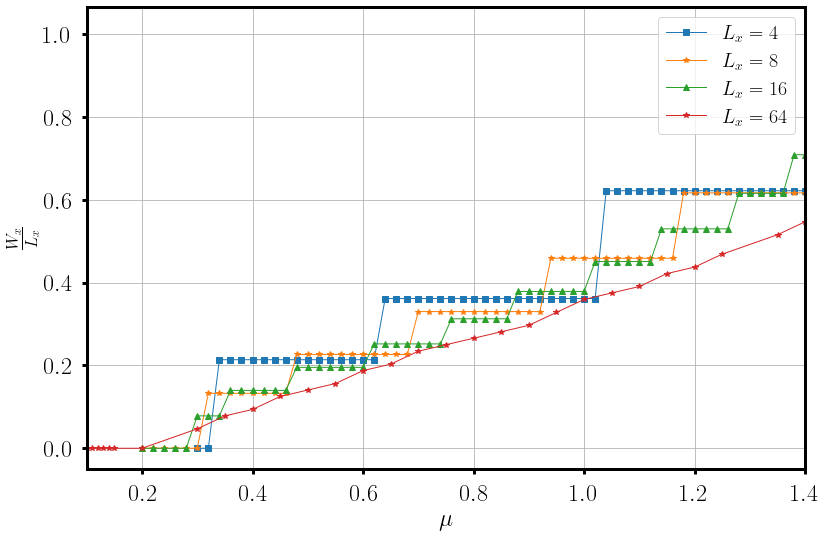

In [159]:
fig, ax1 = plt.subplots(1,figsize=(12,8))

#ax1.plot(L3mu, (L3Wind-L3Wind[0])/3, lw=1, marker='d', label= r'$L_x=3$')
ax1.plot(L4mu, (L4Wind-L4Wind[0])/4, lw=1, marker='s', label= r'$L_x=4$')
ax1.plot(L8mu, (L8Wind-L8Wind[0])/8, lw=1, marker='*', label= r'$L_x=8$')
#ax1.plot(L10mu, (L10Wind-L10Wind[0])/10, lw=1, marker='o', fillstyle='none', label= r'$L_x=10$')
#ax1.plot(L12mu, (L12Wind-L12Wind[0])/12, lw=1, marker='v', label= r'$L_x=12$')
ax1.plot(L16mu, (L16Wind-L16Wind[0])/16, lw=1, marker='^', label= r'$L_x=16$')
#ax1.plot(L20mu, L20Wind-L20Wind[0], lw=1, marker='+', label= r'$L_x=20$')
#ax1.plot(L24mu, L24Wind, lw=1, marker='*', label= r'$L_x=24$')
ax1.plot(L64mu, (L64Wind-L64Wind[0])/64, lw=1, marker='*', label= r'$L_x=64$')

ax1.set_xlabel(r'$\mu$')
ax1.set_ylabel(r'$\frac{W_x}{L_x}$')
ax1.set_xlim([0.1,1.4])
#ax1.set_ylim([ax1.get_ylim()[0],20])
plt.grid()
save_fig("imgs/winding_mu.eps")
ax1.legend(fontsize=20)

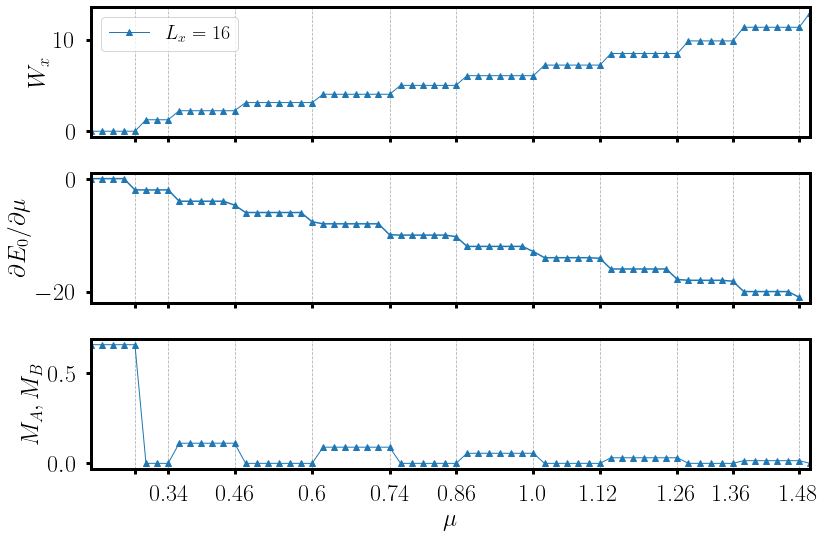

In [21]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(12,8),sharex=True)
jumps = np.diff(L16Wind); loc = jumps.nonzero(); 
diffWindingL16  = jumps[loc]; muCL16 = L16mu[loc]; L16eGS = L16energy[loc];
dmu = L16mu[2]-L16mu[1]
dEL16dmu = np.diff(L16energy)/dmu
#ax1.plot(L3mu, np.abs(L3MA)/3, lw=1, marker='+', label= r'$L_x=3$')
#ax1.plot(L4mu, np.abs(L4MA)/4, lw=1, marker='o', fillstyle='none', label= r'$L_x=4$')
#ax1.plot(L8mu, np.abs(L8MA)/8, lw=1, marker='s', label= r'$L_x=8$')
#ax1.plot(L10mu, np.abs(L10MA)/10, lw=1, marker='d',fillstyle='none', label= r'$L_x=10$')
#ax1.plot(L12mu, np.abs(L12MA)/12, lw=1, marker='1', label= r'$L_x=12$')
ax1.plot(L16mu, L16Wind-L16Wind[0], lw=1, marker='^', label= r'$L_x=16$')
ax3.plot(L16mu, np.abs(L16MA)/16, lw=1, marker='^', label= r'$L_x=16$')
ax2.plot(L16mu[:-1], dEL16dmu,marker='^', label= r'$L_x=16$')
#ax1.plot(L20mu, L20Wind, lw=1, marker='+', label= r'$L_x=20$')
#ax1.plot(L24mu, L24Wind, lw=1, marker='*', label= r'$L_x=24$')

ax3.set_xlabel(r'$\mu$')
ax3.set_ylabel(r'$M_A, M_B$')
ax1.set_ylabel(r'$W_x$')
ax2.set_ylabel(r'$\partial E_0/\partial \mu$')
ax2.set_xlim([0.2,1.5])
ax1.set_xlim([0.2,1.5])
ax1.set_xticks(muCL16)
ax2.set_xticks(muCL16)
ax3.set_xticks(muCL16)
muCL16_label = [str(mu) for mu in muCL16]
muCL16_label[0] = ""
ax2.set_xticklabels(muCL16_label)
#ax1.set_ylim([6,21])
ax1.grid(axis="x", linestyle='--')
ax2.grid(axis="x", linestyle='--')
ax3.grid(axis="x", linestyle='--')
ax1.legend(fontsize=20,loc="upper left",bbox_to_anchor=(0.0,1))
#ax2.legend(fontsize=20,loc="upper left",bbox_to_anchor=(0.08,1))

save_fig("imgs/winding_sectors.eps",strict=True)

In [8]:
# L=3
jumps = np.diff(L3Wind); loc = jumps.nonzero(); 
diffWindingL3  = jumps[loc]; muCL3 = L3mu[loc]; L3eGS = L3energy[loc];
# L=4
jumps = np.diff(L4Wind); loc = jumps.nonzero(); 
diffWindingL4  = jumps[loc]; muCL4 = L4mu[loc]; L4eGS = L4energy[loc];
# L=8
jumps = np.diff(L8Wind); loc = jumps.nonzero(); 
diffWindingL8  = jumps[loc]; muCL8 = L8mu[loc]; L8eGS = L8energy[loc];
# L=10
jumps = np.diff(L10Wind); loc = jumps.nonzero(); 
diffWindingL10  = jumps[loc]; muCL10 = L10mu[loc]; L10eGS = L10energy[loc];
# L=12
jumps = np.diff(L12Wind); loc = jumps.nonzero(); 
diffWindingL12  = jumps[loc]; muCL12 = L12mu[loc]; L12eGS = L12energy[loc];
# L=16
jumps = np.diff(L16Wind); loc = jumps.nonzero(); 
diffWindingL16  = jumps[loc]; muCL16 = L16mu[loc]; L16eGS = L16energy[loc];

In [79]:

df_0_291=pd.read_csv("./../02_DMRG/L_64/obs_L64/mu0.291/result.cvs",delimiter="  ")
df_0_313=pd.read_csv("./../02_DMRG/L_64/obs_L64/mu0.313/result.cvs",delimiter="  ",engine='python')
df_0_319=pd.read_csv("./../02_DMRG/L_64/obs_L64/mu0.319/result.cvs",delimiter="  ")
df_1_28=pd.read_csv("./../02_DMRG/L_64/obs_L64/mu1.28/result.cvs",delimiter="  ")
df_1_29=pd.read_csv("./../02_DMRG/L_64/obs_L64/mu1.29/result.cvs",delimiter="  ")
df_1_3=pd.read_csv("./../02_DMRG/L_64/obs_L64/mu1.3/result.cvs",delimiter="  ")
df_1_91=pd.read_csv("./../02_DMRG/L_64/obs_L64/mu1.91/result.cvs",delimiter="  ")
df_1_92=pd.read_csv("./../02_DMRG/L_64/obs_L64/mu1.92/result.cvs",delimiter="  ")
df_1_925=pd.read_csv("./../02_DMRG/L_64/obs_L64/mu1.925/result.cvs",delimiter="  ")
df_1_93=pd.read_csv("./../02_DMRG/L_64/obs_L64/mu1.93/result.cvs",delimiter="  ")

/home/pkrah/Software/miniconda3/envs/sPOD/lib/python3.9/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


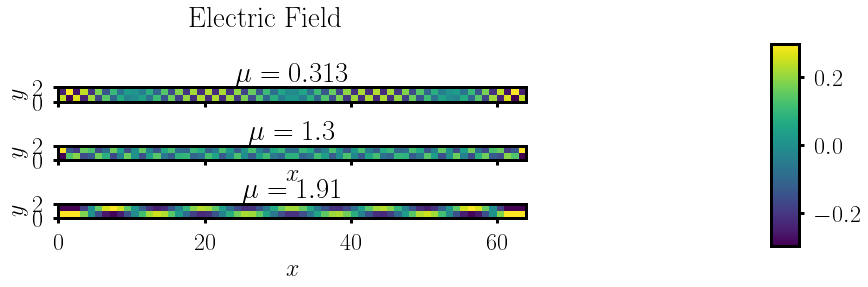

In [190]:
import matplotlib.gridspec as gridspec

Flipp_lattice_0_313 = np.column_stack([df_0_313["E_up"].values,df_0_313["E_bot"].values]).T
Flipp_lattice_1_3 = np.column_stack([df_1_3["E_up"].values,df_1_3["E_bot"].values]).T
Flipp_lattice_1_91 = np.column_stack([df_1_91["E_up"].values,df_1_91["E_bot"].values]).T

vmin = np.min([Flipp_lattice_0_313,Flipp_lattice_1_3,Flipp_lattice_1_91])*0.6
vmax = -vmin#np.max([Flipp_lattice_0_313,Flipp_lattice_1_3,Flipp_lattice_1_91])*0.6

h = [0,0,0]
fig,ax = plt.subplots(3,1,sharex=True,figsize=(20,4))
fig.suptitle('Electric Field')
#ax[0].plot(df_0_313["mag"])
#ax[0].set_title("Magnetization")
h[0]= ax[0].pcolormesh(Flipp_lattice_0_313[:,:-1],vmin=vmin,vmax=vmax)
ax[0].axis("image")
ax[0].set_title("$\mu=0.313$")
#ax[0].set_xlabel("$x$")
ax[0].set_ylabel("$y$")

h[1]=ax[1].pcolormesh(Flipp_lattice_1_3[:,:-1],vmin=vmin,vmax=vmax)
ax[1].axis("image")
ax[1].set_title("$\mu=1.3$")
ax[1].set_xlabel("$x$")
ax[1].set_ylabel("$y$")
#ax[0].plot(df_0_313["mag"])
#ax[0].set_title("Magnetization")
h[2] = ax[2].pcolormesh(Flipp_lattice_1_91[:,:-1],vmin=vmin,vmax=vmax)
ax[2].axis("image")
ax[2].set_title("$\mu=1.91$")
ax[2].set_xlabel("$x$")
ax[2].set_ylabel("$y$")

#fig.subplots_adjust(right=0.8)
#cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
#fig.colorbar(h[2], cax=cbar_ax)

save_fig("imgs/electric_fields.eps",strict=True)


Text(0, 0.5, '$y$')

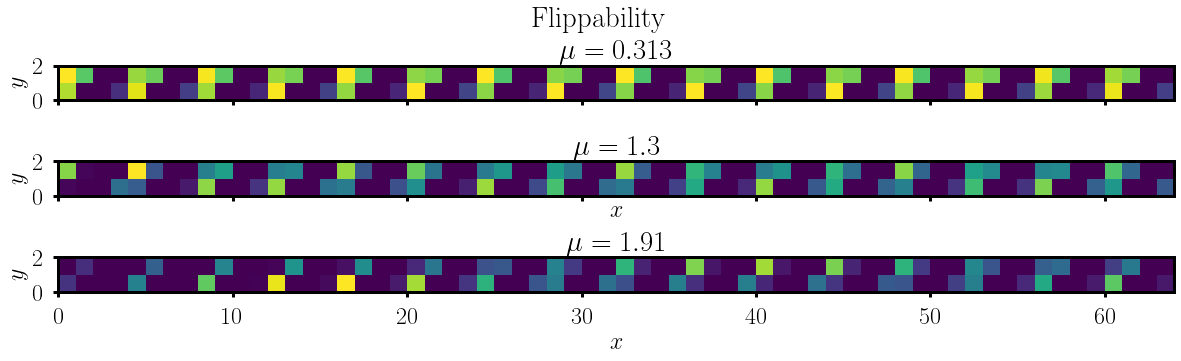

In [148]:
Flipp_lattice_0_313 = np.column_stack([df_0_313["flipp_up"].values,df_0_313["flipp_bot"].values]).T
Flipp_lattice_1_3 = np.column_stack([df_1_3["flipp_up"].values,df_1_3["flipp_bot"].values]).T
Flipp_lattice_1_91 = np.column_stack([df_1_91["flipp_up"].values,df_1_91["flipp_bot"].values]).T

fig,ax = plt.subplots(3,1,figsize=(20,5),sharex=True)
fig.suptitle('Flippability')
#ax[0].plot(df_0_313["mag"])
#ax[0].set_title("Magnetization")
ax[0].pcolormesh(Flipp_lattice_0_313[:,:-1])
ax[0].axis("image")
ax[0].set_title("$\mu=0.313$")
#ax[0].set_xlabel("$x$")
ax[0].set_ylabel("$y$")

ax[1].pcolormesh(Flipp_lattice_1_3[:,:-1])
ax[1].axis("image")
ax[1].set_title("$\mu=1.3$")
ax[1].set_xlabel("$x$")
ax[1].set_ylabel("$y$")
#ax[0].plot(df_0_313["mag"])
#ax[0].set_title("Magnetization")
ax[2].pcolormesh(Flipp_lattice_1_91[:,:-1])
ax[2].axis("image")
ax[2].set_title("$\mu=1.91$")
ax[2].set_xlabel("$x$")
ax[2].set_ylabel("$y$")

Text(0.5, 0, '$x$')

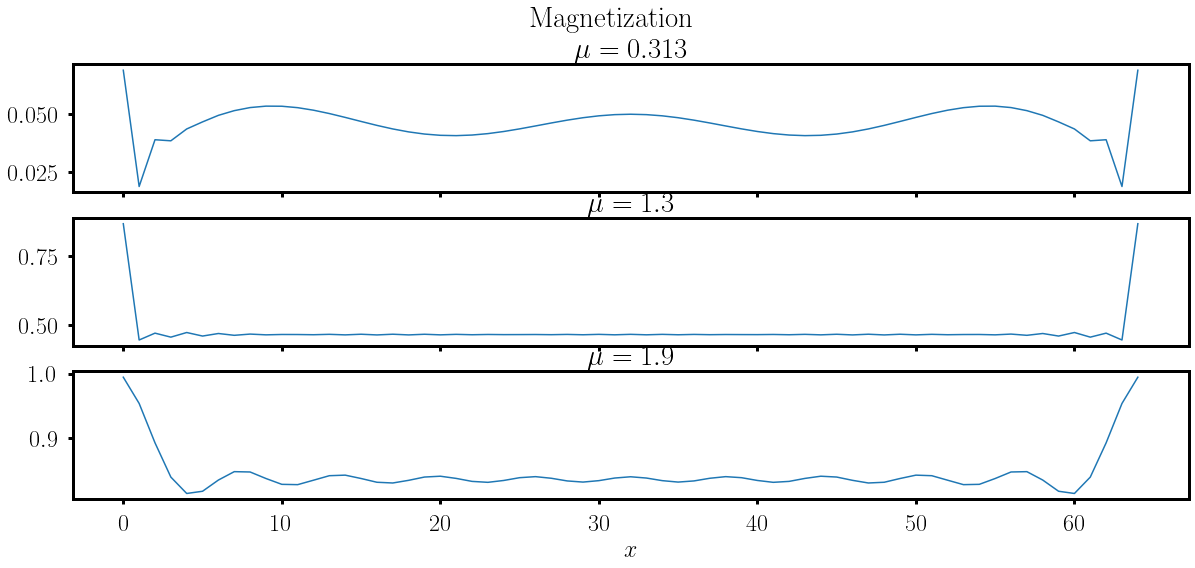

In [141]:
Flipp_lattice_0_313 = np.column_stack([df_0_313["E_up"].values,df_0_313["E_bot"].values]).T
Flipp_lattice_1_3 = np.column_stack([df_1_3["E_up"].values,df_1_3["E_bot"].values]).T
Flipp_lattice_1_91 = np.column_stack([df_1_91["E_up"].values,df_1_91["E_bot"].values]).T

fig,ax = plt.subplots(3,1,figsize=(20,8),sharex=True)
fig.suptitle('Magnetization')
ax[0].plot(df_0_313["mag"])
ax[0].set_title("$\mu=0.313$")

ax[1].plot(df_1_3["mag"])
#ax[0].set_title("Magnetization")
ax[1].set_title("$\mu=1.3$")

ax[2].plot(df_1_91["mag"])
#ax[0].set_title("Magnetization")
ax[2].set_title("$\mu=1.9$")
ax[2].set_xlabel("$x$")
